In [1]:
import pandas as pd

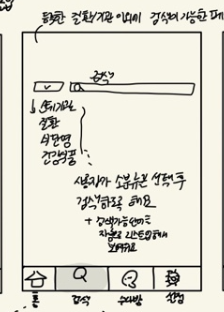
< 검색 페이지에서, 유저가 신체기관 입력 -> 건강기능식품 추천 제품명 리스팅 시스템 > 

* 사용될 DB데이블)  <br>
[01신체기능별정보및추천원료] <br>
"disease(질환명)" | "ingredients(권장식재료)" | 이미지 | 정보 <br>
[food_recipe_DB_2] <br>
메뉴명 | 전체재료 | "재료" | 이미지 | "조리법" <br>
<br>
* 최종 목표) 유저가 '신체기관'(ex.간) 입력 시, 해당 기관에 도움이 되는 효능과 원료를 가진 제품명을 추천 <br>
<br>
* 구현 프로세스) <br>
1) [03]에 "Score"열 생성.  <br>
2) 유저 인풋과 -> [01]"질환명"열과 매칭 -> 다시 [03]"효능"열과 매칭 -> 매칭되는 결과가 있을 때마다 Score 1점씩 추가 <br>
3) 모든 아이템의 최종 Score중 가장 높은 Score를 가진 아이템 최대 20개 출력 <br>

In [2]:
pd.options.display.max_colwidth

50

In [53]:
# df01 데이터프레임 불러오는 코드 
df01 = pd.read_csv('recommendation_recipe_ver2.csv',encoding='utf-8')
pd.options.display.max_colwidth
df01 = df01.dropna()
df01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 4 columns):
disease        10 non-null object
ingredients    10 non-null object
image          10 non-null object
recipe         10 non-null object
dtypes: object(4)
memory usage: 400.0+ bytes


In [46]:
df_3 = pd.read_csv('merged_df.csv', encoding = 'utf-8').reset_index().rename(columns={'index':'recipeID'})
pd.options.display.max_colwidth
len(df_3)

1243

In [47]:
df_3.head(2)

,recipeID,요리명,재료(계량 포함),재료,레시피,관련 질환,질환별 추천 식재료
0,0,칼륨 듬뿍 고구마죽,"고구마죽\n고구마 100g(2/3개), 설탕 2g(1/3작은술), 찹쌀가루 3g(2...","찹쌀가루, 설탕, 물, 잣, 고구마",1. 고구마는 깨끗이 씻어서 껍질을 벗기고 4cm 정도로 잘라준다.a2. 찜기에 고...,뇌졸중,두부 된장 청국장 호두 잣 정어리 다시마 미역 꽁치 동태 생선 조개류 쌀 보리 감자...
1,1,누룽지 두부 계란죽,"채소준비\n애호박 30g(1/6개), 표고버섯 20g(2개), 당근 5g(3×2×1...","당근, 표고버섯, 애호박, 참기름, 소금, 달걀, 흰 후추, 참깨, 누룽지, 순두부","1. 깨끗이 씻어 손질한 애호박, 당근과 기둥을 뗀 표고버섯을 잘게 다지듯이 썬다....",당뇨병,다시마 미역 김 해파리 채소 쑥 토마토 고추 오이 가지 마늘 양파 도라지 무 당근 ...


In [48]:
# '북마크'열 생성
temp_mark = list(range(1243))
temp_mark = [0 for x in temp_mark]
df_3['bookmark'] = temp_mark
bookmark = pd.read_csv('랜덤유저데이터(협업필터링알고리즘에서사용).csv',index_col='Unnamed: 0')#01 신체기관열 -> 02 효능열 : 두열의 유사도 분석 -> top 10 추천해주는 시스템
bookmark.head()

,userID,age,sex,관심등록기관,관심등록질환,건강기능식품하트기록,레시피북마크기록
0,0,29,F,관절 뼈,빈혈,"[12001, 967, 13503, 3652, 10792, 13090, 5675, ...","[696, 1056, 276, 149, 55, 602, 433, 915, 186, ..."
1,1,57,M,칼슘 흡수,심근경색증,"[10037, 22064, 13996, 20723, 21317, 12566, 213...","[198, 505, 561, 341, 1124, 352, 922, 387, 666,..."
2,2,59,F,간,아토피성 피부염,"[30333, 17615, 13550, 4471, 10217, 19693, 1665...","[583, 641, 134, 186, 256, 931, 876, 533, 287, ..."
3,3,58,F,어린이키성장,고혈압,"[17281, 4132, 27317, 5188, 26656, 3934, 18381,...","[907, 1088, 498, 683, 294, 444, 939, 1213, 508..."
4,4,24,F,체지방 감소,아토피성 피부염,"[4289, 16383, 10634, 22495, 4881, 9, 9288, 372...","[215, 922, 149, 863, 968, 81, 473, 798, 195, 1..."


In [49]:
# df_3 heart열 데이터 채워주기
for user_bookmart_record in bookmark['레시피북마크기록']:
    for item_index in eval(user_bookmart_record):
        df_3['bookmark'][item_index] += 1

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [52]:
df_3.head()

,recipeID,요리명,재료(계량 포함),재료,레시피,관련 질환,질환별 추천 식재료,bookmark
0,0,칼륨 듬뿍 고구마죽,"고구마죽\n고구마 100g(2/3개), 설탕 2g(1/3작은술), 찹쌀가루 3g(2...","찹쌀가루, 설탕, 물, 잣, 고구마",1. 고구마는 깨끗이 씻어서 껍질을 벗기고 4cm 정도로 잘라준다.a2. 찜기에 고...,뇌졸중,두부 된장 청국장 호두 잣 정어리 다시마 미역 꽁치 동태 생선 조개류 쌀 보리 감자...,40
1,1,누룽지 두부 계란죽,"채소준비\n애호박 30g(1/6개), 표고버섯 20g(2개), 당근 5g(3×2×1...","당근, 표고버섯, 애호박, 참기름, 소금, 달걀, 흰 후추, 참깨, 누룽지, 순두부","1. 깨끗이 씻어 손질한 애호박, 당근과 기둥을 뗀 표고버섯을 잘게 다지듯이 썬다....",당뇨병,다시마 미역 김 해파리 채소 쑥 토마토 고추 오이 가지 마늘 양파 도라지 무 당근 ...,30
2,2,오색지라시 스시,"초밥\n밥 210g(1공기)\n배합초\n식초 20g(1⅓큰술), 설탕 10g(2작은...","밥, 소금, 설탕, 식초, 참기름, 대두유, 달걀노른자, 식용유, 새우, 홍피망, ...",1. 배합초는 중불에서 설탕이 녹을 때까지 저어가면서 녹인다.2. 뜨거운 밥에 배합...,당뇨병,다시마 미역 김 해파리 채소 쑥 토마토 고추 오이 가지 마늘 양파 도라지 무 당근 ...,32
3,3,두부 곤약 나물 비빔밥,"두부 곤약잡곡밥\n두부 110g(⅓모), 흰쌀 15g, 현미쌀 3g, 찹쌀 3g, ...","찹쌀, 현미쌀, 두부, 흰쌀, 실곤약, 콩나물, 애호박, 고사리, 소금, 당근, 표...",1. 고사리는 상태에 따라 2~5시간 정도 불린 후 30분 정도 삶아 찬물에 헹구어...,당뇨병,다시마 미역 김 해파리 채소 쑥 토마토 고추 오이 가지 마늘 양파 도라지 무 당근 ...,39
4,4,저염 간장을 이용한 닭개장 비빔밥,"흑미밥\n쌀 90g, 검은 쌀 10g\n닭가슴살 삶기\n닭가슴살 40g(1/3개),...","검은쌀, 쌀, 닭가슴살, 월계수잎, 후추, , 숙주, 토란대, 고사리, 실고추, 들...",1. 쌀은 30분 정도 불린 후 물을 1:1로 하여 밥을 짓는다.2. 숙주는 끓는 ...,협심증,잡곡 쇠고기 돼지고기 등심 닭가슴살 꽁치 동태 생선 두부 과일 고기 참기름 들기름...,45


In [53]:
df_3.to_csv('merged_df.csv')

In [54]:
new = pd.read_csv('merged_df.csv')
new

,Unnamed: 0,recipeID,요리명,재료(계량 포함),재료,레시피,관련 질환,질환별 추천 식재료,bookmark
0,0,0,칼륨 듬뿍 고구마죽,"고구마죽\n고구마 100g(2/3개), 설탕 2g(1/3작은술), 찹쌀가루 3g(2...","찹쌀가루, 설탕, 물, 잣, 고구마",1. 고구마는 깨끗이 씻어서 껍질을 벗기고 4cm 정도로 잘라준다.a2. 찜기에 고...,뇌졸중,두부 된장 청국장 호두 잣 정어리 다시마 미역 꽁치 동태 생선 조개류 쌀 보리 감자...,40
1,1,1,누룽지 두부 계란죽,"채소준비\n애호박 30g(1/6개), 표고버섯 20g(2개), 당근 5g(3×2×1...","당근, 표고버섯, 애호박, 참기름, 소금, 달걀, 흰 후추, 참깨, 누룽지, 순두부","1. 깨끗이 씻어 손질한 애호박, 당근과 기둥을 뗀 표고버섯을 잘게 다지듯이 썬다....",당뇨병,다시마 미역 김 해파리 채소 쑥 토마토 고추 오이 가지 마늘 양파 도라지 무 당근 ...,30
2,2,2,오색지라시 스시,"초밥\n밥 210g(1공기)\n배합초\n식초 20g(1⅓큰술), 설탕 10g(2작은...","밥, 소금, 설탕, 식초, 참기름, 대두유, 달걀노른자, 식용유, 새우, 홍피망, ...",1. 배합초는 중불에서 설탕이 녹을 때까지 저어가면서 녹인다.2. 뜨거운 밥에 배합...,당뇨병,다시마 미역 김 해파리 채소 쑥 토마토 고추 오이 가지 마늘 양파 도라지 무 당근 ...,32
3,3,3,두부 곤약 나물 비빔밥,"두부 곤약잡곡밥\n두부 110g(⅓모), 흰쌀 15g, 현미쌀 3g, 찹쌀 3g, ...","찹쌀, 현미쌀, 두부, 흰쌀, 실곤약, 콩나물, 애호박, 고사리, 소금, 당근, 표...",1. 고사리는 상태에 따라 2~5시간 정도 불린 후 30분 정도 삶아 찬물에 헹구어...,당뇨병,다시마 미역 김 해파리 채소 쑥 토마토 고추 오이 가지 마늘 양파 도라지 무 당근 ...,39
4,4,4,저염 간장을 이용한 닭개장 비빔밥,"흑미밥\n쌀 90g, 검은 쌀 10g\n닭가슴살 삶기\n닭가슴살 40g(1/3개),...","검은쌀, 쌀, 닭가슴살, 월계수잎, 후추, , 숙주, 토란대, 고사리, 실고추, 들...",1. 쌀은 30분 정도 불린 후 물을 1:1로 하여 밥을 짓는다.2. 숙주는 끓는 ...,협심증,잡곡 쇠고기 돼지고기 등심 닭가슴살 꽁치 동태 생선 두부 과일 고기 참기름 들기름...,45
...,...,...,...,...,...,...,...,...,...
1238,1238,1238,홍합 배춧국,"홍합 50g, 배추 50g, 무 30g, 마늘 2g, 파 3g, 홍고추 1g, 소금...","파, 소금, 홍합, 배추, 마늘, 무, 홍고추",1. 끓는 물에 한 입 크기로 썬 무를 넣는다.2. 무가 투명해지면 배추를 넣고 끓...,당뇨병,다시마 미역 김 해파리 채소 쑥 토마토 고추 오이 가지 마늘 양파 도라지 무 당근 ...,44
1239,1239,1239,"단호박 생선탕수, 키위소스","동태살 120g, 단호박 10g, 당근 15g, 오이 15g, 양파 15g, 전분 ...","키위소스, 동태살, 오이, 식초, 당근, 계란, 단호박, 목이버섯, 양파, 튀김가루...","1. 따뜻한 물에 부린 목이버섯, 동태살, 당근, 오이, 양파를 먹기 좋은 크기로 ...",당뇨병,다시마 미역 김 해파리 채소 쑥 토마토 고추 오이 가지 마늘 양파 도라지 무 당근 ...,38
1240,1240,1240,낙지모듬초말이,"낙지 30g, 가지 12g, 오이 7g, 표고버섯 24g, 당근 10g, 미나리 1...","설탕, 물, 오이, 사과, 간장10g, 미나리, 식초, 가지, 당근, 낙지, 고춧가...","1. 낙지는 살짝 데치고 한입 크기로 썬다.2. 오이와 당근, 표고, 가지는 얇게 ...",당뇨병,다시마 미역 김 해파리 채소 쑥 토마토 고추 오이 가지 마늘 양파 도라지 무 당근 ...,44
1241,1241,1241,삼각김밥 빵,"(반죽재료) 쌀가루 200g, 우유 80g, 물 15ml, 르뱅 발효종 160g, ...","올리브유, 르뱅발효종, 물, 쌀가루, 달걀, 소금, 당근, 먹물가루, 양파, 우유,...","1. (속재료) 양파, 마늘, 토마토, 파프리카, 닭가슴살을 다져 올리브유를 두른 ...",당뇨병,다시마 미역 김 해파리 채소 쑥 토마토 고추 오이 가지 마늘 양파 도라지 무 당근 ...,33


(구현 프로세스 시각화)
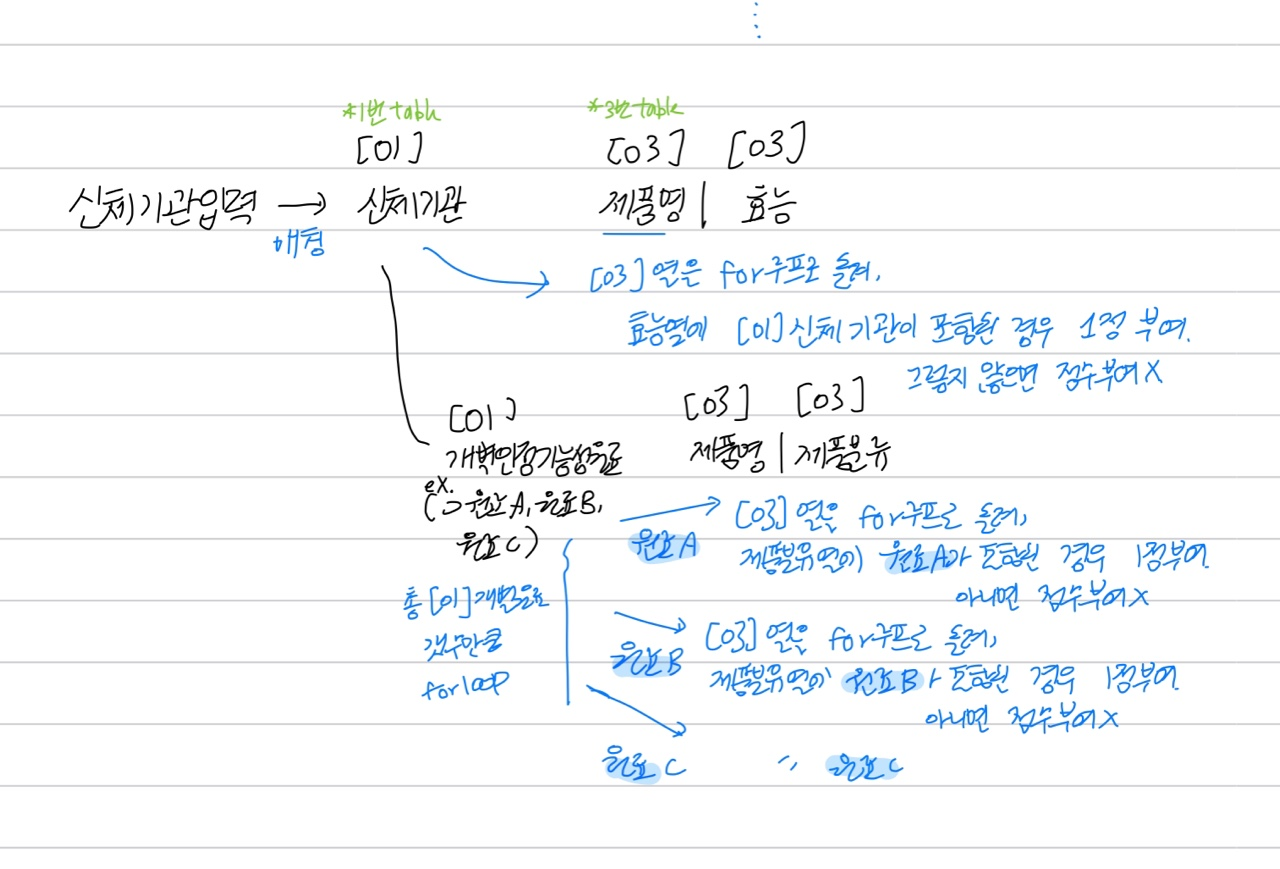

(Score열이 추가된 df03 모습)
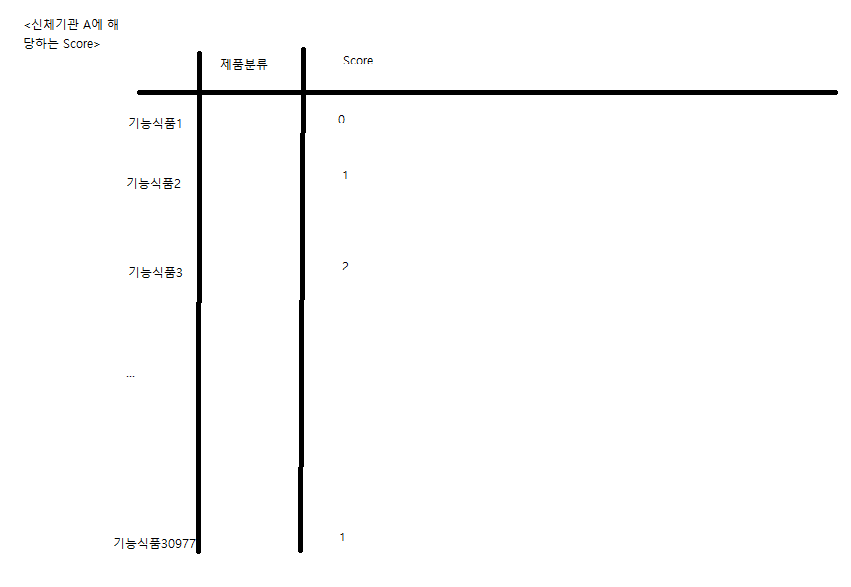

In [28]:
# # 'Score'열 생성
# temp_score = list(range(1317))
# temp_score = [0 for x in temp_score]
# df_3['Score'] = temp_score

In [62]:
for disease in list(df01['disease']):
    column_str = 'Score_{}'.format(disease)
    
    # 'Score'열 생성
    temp_score = list(range(1243))
    temp_score = [0 for x in temp_score]
    df_3[column_str] = temp_score
    
    #유저에게 관심있는 질환을 인풋으로 받아
    input_dise = disease
    
    #입력된 질환에 권장되는 식재료를 포함하는 레시피의 score열에 점수 부여
    index_input_dise = df01.loc[df01['disease'] == input_dise].index[0] # input_dise의 df01내 index 번호. 다음 라인에서 사용. 
    elements_for_dise = df01.loc[df01['disease'] == input_dise]['ingredients'][index_input_dise] # 특정 질

    for element_str in elements_for_dise:
        for row_idx, product_elements_str in enumerate(df_3['재료']): # 메뉴별 들어간 재료
            if element_str in product_elements_str.split(','):
                df_3[column_str].iloc[row_idx] += 1 
                
#     print("✅도출된 최종 재료 점수의 value를 count")
#     print(df_3[column_str].value_counts())  
    
    
    value_counts_df = df_3[column_str].value_counts()
    print(value_counts_df)

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0     1014
11     207
1       22
Name: Score_고혈압, dtype: int64
0     1025
35     207
1        6
3        5
Name: Score_뇌졸중, dtype: int64
0     1005
49     207
2       20
1        6
3        5
Name: Score_당뇨병, dtype: int64
0     1010
29     207
1       23
2        3
Name: Score_천식, dtype: int64
0     1032
40     207
1        4
Name: Score_아토피성 피부염, dtype: int64
0     1025
21     206
1       11
22       1
Name: Score_간염, dtype: int64
0     1015
53     207
1       21
Name: Score_빈혈, dtype: int64
0     1030
20     206
1        6
21       1
Name: Score_심근경색증, dtype: int64
0     1012
13     207
1       24
Name: Score_비만, dtype: int64
0     1030
14     206
1        6
15       1
Name: Score_협심증, dtype: int64


In [65]:
df_3.to_csv('검색페이지_관심질환별Score.csv')

In [2]:
df_score = pd.read_csv('검색페이지_관심질환별Score.csv',index_col="Unnamed: 0")
df_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 1242
Data columns (total 18 columns):
recipeID          1243 non-null int64
요리명               1243 non-null object
재료(계량 포함)         1240 non-null object
재료                1243 non-null object
레시피               1243 non-null object
관련 질환             1243 non-null object
질환별 추천 식재료        1243 non-null object
bookmark          1243 non-null int64
Score_고혈압         1243 non-null int64
Score_뇌졸중         1243 non-null int64
Score_당뇨병         1243 non-null int64
Score_천식          1243 non-null int64
Score_아토피성 피부염    1243 non-null int64
Score_간염          1243 non-null int64
Score_빈혈          1243 non-null int64
Score_심근경색증       1243 non-null int64
Score_비만          1243 non-null int64
Score_협심증         1243 non-null int64
dtypes: int64(12), object(6)
memory usage: 184.5+ KB


In [5]:
def searchpage_inputDise():
    input_dise = str(input("관심있는 질환을 입력해주세요: "))
    col_name = "Score_{}".format(input_dise)
    df_result = df_score.sort_values(by=col_name,ascending=False).iloc[:50] # top 50개 추출
    return df_result

# 좋아요 순으로 정렬하기
def searchpage_inputDise_by_mark():
    df_result = searchpage_inputDise()
    df_result_by_mark = df_result.sort_values(by='bookmark',ascending=False)
    return df_result_by_mark

In [7]:
top50_recipe = searchpage_inputDise()
# searchpage_inputOrgans_by_like()

관심있는 질환을 입력해주세요: 협심증


In [9]:
top50_recipe[['recipeID','요리명','bookmark']]

,recipeID,요리명,bookmark
485,485,소고기를 품은 키위 볶음밥,43
621,621,발사믹소스를 곁들인 오리스테이크,42
208,208,와사비 연어초밥,43
1093,1093,이태리튀밥,50
1092,1092,펌킨크로켓,37
1091,1091,유자 치킨 꿔바로우,43
1090,1090,현미 고구마 아란치니,55
1089,1089,그린커리,40
1087,1087,묵은지비프롤,45
1086,1086,곤약 백김치 말이,41
